In [131]:
import os
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [132]:
# GET DATA
os.chdir("C:/users/devon/documents/github/sign-language-project/project data/sign_mnist_train.csv")
data = pd.read_csv("sign_mnist_train.csv")
os.chdir("C:/users/devon/documents/github/sign-language-project/project data/sign_mnist_test.csv")
testing = pd.read_csv("sign_mnist_test.csv")

In [133]:
# VIEW RAW DATA
print(data.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [134]:
# SHOW MATRIX
x = data.iloc[:, 1:].values
print('Feature matrix:\n', x, '\n')

Feature matrix:
 [[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]] 



In [135]:
# SHOW LABELS
y = data.iloc[:, :1].values.flatten()
print('Labels:\n', y)

Labels:
 [ 3  6  2 ... 18 17 23]


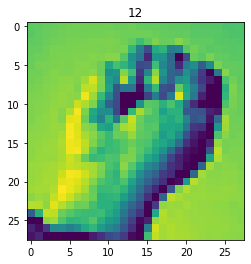

In [165]:
# VIEW A PIECE OF THE DATA
plt.title(str(y[100]))
plt.imshow(x[100].reshape(28, 28))
plt.show()

In [137]:
# ENCODE Y
encode_y = np.eye(25)[y]
print(encode_y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [138]:
# SET WEIGHTS
weights = {
    'w1' : tf.Variable(tf.random_normal([784, 256])),
    'w2' : tf.Variable(tf.random_normal([256, 256])),
    'w3' : tf.Variable(tf.random_normal([256, 256])),
    'w4' : tf.Variable(tf.random_normal([256, 256])),
    'w5' : tf.Variable(tf.random_normal([256, 256])),
    'w6' : tf.Variable(tf.random_normal([256, 256])),
    'w7' : tf.Variable(tf.random_normal([256, 256])),
    'w8' : tf.Variable(tf.random_normal([256, 256])),
    'w9' : tf.Variable(tf.random_normal([256, 256])),
    'w10' : tf.Variable(tf.random_normal([256, 256])),
    '_w' : tf.Variable(tf.random_normal([256, 25]))
}

In [139]:
# SET BIASES
biases = {
    'b1' : tf.Variable(tf.random_normal([256])),
    'b2' : tf.Variable(tf.random_normal([256])),
    'b3' : tf.Variable(tf.random_normal([256])),
    'b4' : tf.Variable(tf.random_normal([256])),
    'b5' : tf.Variable(tf.random_normal([256])),
    'b6' : tf.Variable(tf.random_normal([256])),
    'b7' : tf.Variable(tf.random_normal([256])),
    'b8' : tf.Variable(tf.random_normal([256])),
    'b9' : tf.Variable(tf.random_normal([256])),
    'b10' : tf.Variable(tf.random_normal([256])),
    '_b' : tf.Variable(tf.random_normal([25]))
}

In [140]:
# DEFINE MLP NETWORK
def neural_network(x, weights, biases):
    layer1 = tf.nn.relu(tf.add(tf.matmul(x, weights['w1']), biases['b1']))
    layer2 = tf.nn.relu(tf.add(tf.matmul(layer1, weights['w2']), biases['b2']))
    layer3 = tf.nn.relu(tf.add(tf.matmul(layer2, weights['w3']), biases['b3']))
    layer4 = tf.nn.relu(tf.add(tf.matmul(layer3, weights['w4']), biases['b4']))
    layer5 = tf.nn.relu(tf.add(tf.matmul(layer4, weights['w5']), biases['b5']))
    layer6 = tf.nn.relu(tf.add(tf.matmul(layer5, weights['w6']), biases['b6']))
    layer7 = tf.nn.relu(tf.add(tf.matmul(layer6, weights['w7']), biases['b7']))
    layer8 = tf.nn.relu(tf.add(tf.matmul(layer7, weights['w8']), biases['b8']))
    layer9 = tf.nn.relu(tf.add(tf.matmul(layer8, weights['w9']), biases['b9']))
    layer10 = tf.nn.relu(tf.add(tf.matmul(layer9, weights['w10']), biases['b10']))
    layer_out = tf.matmul(layer10, weights['_w']) + biases['_b']
    return layer_out

In [141]:
# NETWORK X AND Y
_x = tf.placeholder('float', [None, 784])
_y = tf.placeholder('float', [None, 25])

In [142]:
# SET PARAMETERS
learning_rate = 0.002
batch_size = 128
epochs = 5000
step = 500

In [143]:
# SET UP NN
logits = neural_network(_x, weights, biases)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

In [144]:
# SET LOSS AND TRAINING OPTIMIZER
loss_optimizer = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = _y))
train_optimizer = optimizer.minimize(loss_optimizer)

In [145]:
# SET PREDICTION AND ACCURACY
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [146]:
# SET UP SESSION
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
cost_hist, acc_hist = [], []

In [147]:
# GET NEXT BATCH
def next_batch(batch_size, data, labels):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    idx = idx[: batch_size]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [148]:
# USE SESSION
for epoch in range(1, epochs+1):
    batch_x, batch_y = next_batch(batch_size, x, encode_y)
    feed_dict = { _x : batch_x, _y : batch_y }
    sess.run(train_optimizer, feed_dict)
        
    if epoch % step == 0:
        c, acc = sess.run([loss_optimizer, accuracy], feed_dict)
        acc = acc*100
        cost_hist.append(c)
        acc_hist.append(acc)
        print('Epoch ' + str(epoch) + ': Cost: ' + str(c) + ', Accuracy: ' + str(acc))
W = sess.run(weights)
B = sess.run(biases)
print('Accuracy on train data: ' + str(sess.run(accuracy, feed_dict = { _x : x, _y : encode_y }) * 100) + ' %')

Epoch 500: Cost: 203147950000.0, Accuracy: 87.5
Epoch 1000: Cost: 60088600000.0, Accuracy: 93.75
Epoch 1500: Cost: 65588830000.0, Accuracy: 95.3125
Epoch 2000: Cost: 8086569000.0, Accuracy: 98.4375
Epoch 2500: Cost: 17318814000.0, Accuracy: 96.875
Epoch 3000: Cost: 84129260000.0, Accuracy: 96.09375
Epoch 3500: Cost: 114643570000.0, Accuracy: 92.1875
Epoch 4000: Cost: 9577546000.0, Accuracy: 99.21875
Epoch 4500: Cost: 20741984000.0, Accuracy: 97.65625
Epoch 5000: Cost: 20882977000.0, Accuracy: 97.65625
Accuracy on train data: 96.35767340660095 %


In [149]:
def neural_network(x, weights, biases):
    layer1 = np.matmul(x, weights['w1']) + biases['b1']
    layer2 = np.matmul(layer1, weights['w2']) + biases['b2']
    layer3 = np.matmul(layer2, weights['w3']) + biases['b3']
    layer4 = np.matmul(layer3, weights['w4']) + biases['b4']
    layer5 = np.matmul(layer4, weights['w5']) + biases['b5']
    layer6 = np.matmul(layer5, weights['w6']) + biases['b6']
    layer7 = np.matmul(layer6, weights['w7']) + biases['b7']
    layer8 = np.matmul(layer7, weights['w8']) + biases['b8']
    layer9 = np.matmul(layer8, weights['w9']) + biases['b9']
    layer10 = np.matmul(layer9, weights['w10']) + biases['b10']
    layer_out = np.matmul(layer10, weights['_w']) + biases['_b']
    return layer_out

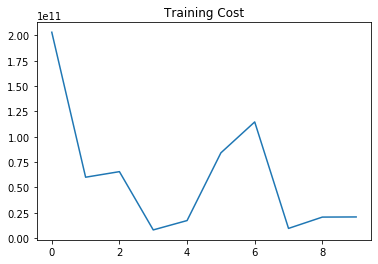

In [150]:
plt.plot(list(range(len(cost_hist))), cost_hist)
plt.title("Training Cost")
plt.show()

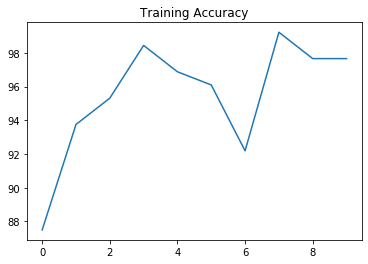

In [151]:
plt.plot(list(range(len(acc_hist))), acc_hist)
plt.title("Training Accuracy")
plt.show()

In [152]:
# GET PREDICTIONS
def prediction(x, w, b):
    pred = neural_network(x, w, b)
    images, predictions = [], []
    for i in x:
        images.append(i.reshape(28, 28))
    for i in pred:
        predictions.append(list(i))
    predictions = [chr(int(i.index(max(i))) + ord('A')) for i in predictions]
    return (images, predictions)

In [153]:
images, preds = prediction(x, W, B)

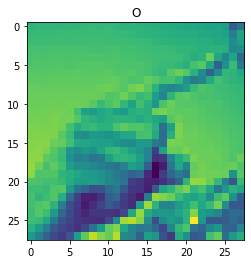

In [154]:
# SHOW A PREDICTION
plt.imshow(images[1])
plt.title(preds[1])
plt.show()

In [155]:
# SHOW TESTING MATRIX
x_test = testing.iloc[:, 1:].values
print('Feature matrix:\n', x_test, '\n')

Feature matrix:
 [[149 149 150 ... 112 120 107]
 [126 128 131 ... 184 182 180]
 [ 85  88  92 ... 225 224 222]
 ...
 [190 191 190 ... 211 209 208]
 [201 205 208 ...  67  70  63]
 [173 174 173 ... 195 193 192]] 



In [156]:
# SHOW TESTING LABELS
y_test = testing.iloc[:, :1].values.flatten()
print('Labels:\n', y_test)

Labels:
 [ 6  5 10 ...  2  4  2]


In [158]:
# ENCODE Y TEST
encode_y_test = np.eye(25)[y_test]
print(encode_y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [160]:
# USE SESSION FOR TESTING DATA
for epoch in range(1, epochs+1):
    batch_x, batch_y = next_batch(batch_size, x_test, encode_y_test)
    feed_dict = { _x : batch_x, _y : batch_y }
    sess.run(train_optimizer, feed_dict)
        
    if epoch % step == 0:
        c, acc = sess.run([loss_optimizer, accuracy], feed_dict)
        acc = acc*100
        cost_hist.append(c)
        acc_hist.append(acc)
        print('Epoch ' + str(epoch) + ': Cost: ' + str(c) + ', Accuracy: ' + str(acc))
W_test = sess.run(weights)
B_test = sess.run(biases)
print('Accuracy on test data: ' + str(sess.run(accuracy, feed_dict = { _x : x_test, _y : encode_y_test }) * 100) + ' %')

Epoch 500: Cost: 1006870500.0, Accuracy: 99.21875
Epoch 1000: Cost: 0.0, Accuracy: 100.0
Epoch 1500: Cost: 0.0, Accuracy: 100.0
Epoch 2000: Cost: 18504060000.0, Accuracy: 97.65625
Epoch 2500: Cost: 0.0, Accuracy: 100.0
Epoch 3000: Cost: 0.0, Accuracy: 100.0
Epoch 3500: Cost: 0.0, Accuracy: 100.0
Epoch 4000: Cost: 0.0, Accuracy: 100.0
Epoch 4500: Cost: 0.0, Accuracy: 100.0
Epoch 5000: Cost: 0.0, Accuracy: 100.0
Accuracy on test data: 99.1355299949646 %


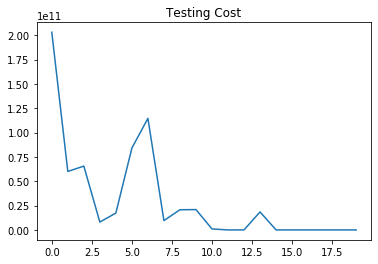

In [161]:
plt.plot(list(range(len(cost_hist))), cost_hist)
plt.title("Testing Cost")
plt.show()

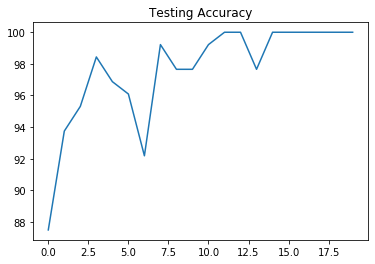

In [162]:
plt.plot(list(range(len(acc_hist))), acc_hist)
plt.title("Testing Accuracy")
plt.show()

In [163]:
images_test, preds_test = prediction(x_test, W_test, B_test)

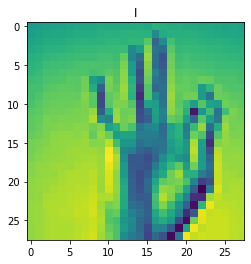

In [164]:
# SHOW A PREDICTION
plt.imshow(images_test[1])
plt.title(preds_test[1])
plt.show()